In [6]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run headless Chrome for scraping without GUI
chrome_options.add_argument("--disable-gpu")

# Set up the Chrome driver using webdriver_manager
driver_service = ChromeService(ChromeDriverManager().install())
driver = webdriver.Chrome(service=driver_service, options=chrome_options)

# Open Jumia Tech Week page
driver.get('https://www.jumia.co.ke/mlp-tech-week/')

# Wait for products to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'article.prd._fb.col.c-prd')))

# Extract page source and parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Close the driver
driver.quit()

# Extract product details
products = soup.find_all('article', class_='prd _fb col c-prd')
data = []

for product in products:
    try:
        title = product.find('h3', class_='name').text.strip()
    except:
        title = None

    try:
        price = product.find('div', class_='prc').text.strip()
    except:
        price = None

    try:
        old_price = product.find('div', class_='old').text.strip() if product.find('div', class_='old') else None
    except:
        old_price = None

    try:
        discount = product.find('div', class_='bdg _dsct _sm').text.strip() if product.find('div', class_='bdg _dsct _sm') else None
    except:
        discount = None

    try:
        rating = product.find('div', class_='stars _s').text.strip() if product.find('div', class_='stars _s') else None
    except:
        rating = None

    product_data = {
        'title': title,
        'price': price,
        'old_price': old_price,
        'discount': discount,
        'rating': rating
    }
    data.append(product_data)

# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('jumia_techweek_products.csv', index=False)

print(df)


                                                title       price  \
0   AILYONS HD-199A Electric Dry Iron Box Silver &...     KSh 929   
1   RichRipple LED Display Bluetooth Headsets 9D S...     KSh 519   
2   Vitron HTC4388FS - 43" Smart Android Frameless...  KSh 19,799   
3   AILYONS FK-0310 Stainless Steel 2.2L Electric ...     KSh 902   
4   Hikers 32'' Inch Frameless Android Smart HD LE...  KSh 11,328   
5   RichRipple Pro3 Bluetooth Headsets Wireless Po...     KSh 499   
6                      Starlink Standard Actuated Kit  KSh 45,500   
7   AILYONS TYB-205 Blender 2In1 With GrinderMachi...   KSh 1,699   
8   AILYONS LST3208W 32" Smart Android FHD Framele...  KSh 11,499   
9   AILYONS FK-0306 Stainless Steel 1.8L Electric ...     KSh 738   
10  Samsung GALAXY A15, 6.5'' HD+, 4GB RAM + 128GB...  KSh 15,678   
11  Lyons FY-1731 Blender 2 In 1 With Grinder Mach...   KSh 1,599   
12  RichRipple Rechargeable 2.4G Wireless Slient M...     KSh 406   
13  Vitron HTC3200S,32"Inch Framel

In [5]:
pip install webdriver_manager

  Obtaining dependency information for webdriver_manager from https://files.pythonhosted.org/packages/b1/51/b5c11cf739ac4eecde611794a0ec9df420d0239d51e73bc19eb44f02b48b/webdriver_manager-4.0.1-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


                                               title       price   old_price  \
0  AILYONS HD-199A Electric Dry Iron Box Silver &...     KSh 929   KSh 1,399   
1  RichRipple LED Display Bluetooth Headsets 9D S...     KSh 519     KSh 920   
2  Vitron HTC4388FS - 43" Smart Android Frameless...  KSh 19,799  KSh 28,599   
3  AILYONS FK-0310 Stainless Steel 2.2L Electric ...     KSh 902   KSh 1,599   
4  Hikers 32'' Inch Frameless Android Smart HD LE...  KSh 11,328  KSh 20,168   

  discount        rating  
0      34%  3.8 out of 5  
1      44%  3.7 out of 5  
2      31%  3.9 out of 5  
3      44%  3.9 out of 5  
4      44%    4 out of 5  
                                               title    price  old_price  \
0  AILYONS HD-199A Electric Dry Iron Box Silver &...    929.0     1399.0   
1  RichRipple LED Display Bluetooth Headsets 9D S...    519.0      920.0   
2  Vitron HTC4388FS - 43" Smart Android Frameless...  19799.0    28599.0   
3  AILYONS FK-0310 Stainless Steel 2.2L Electric ... 

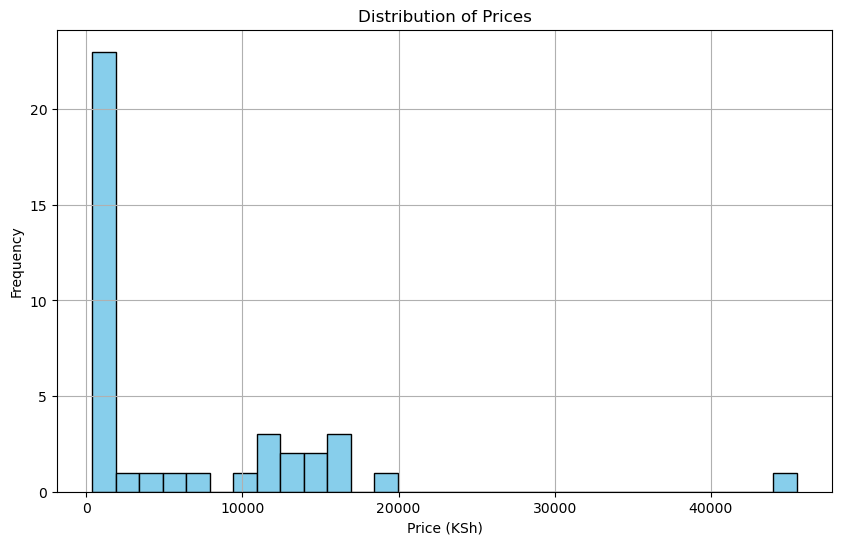

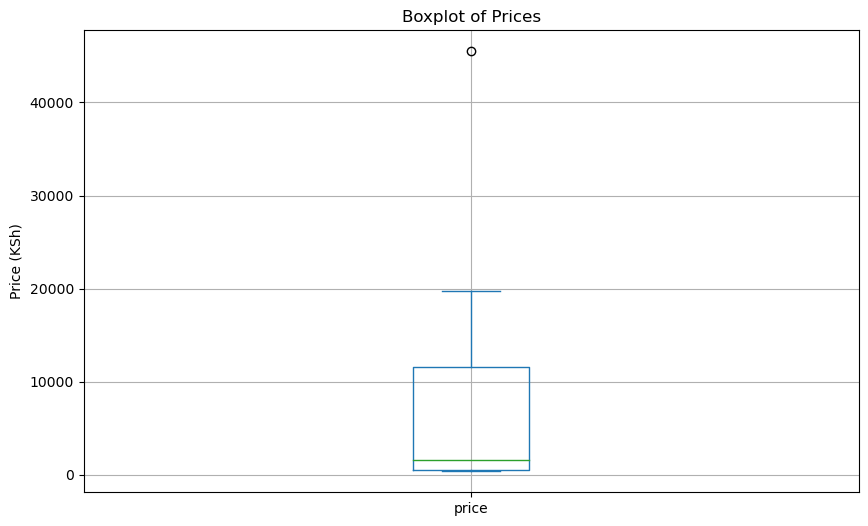

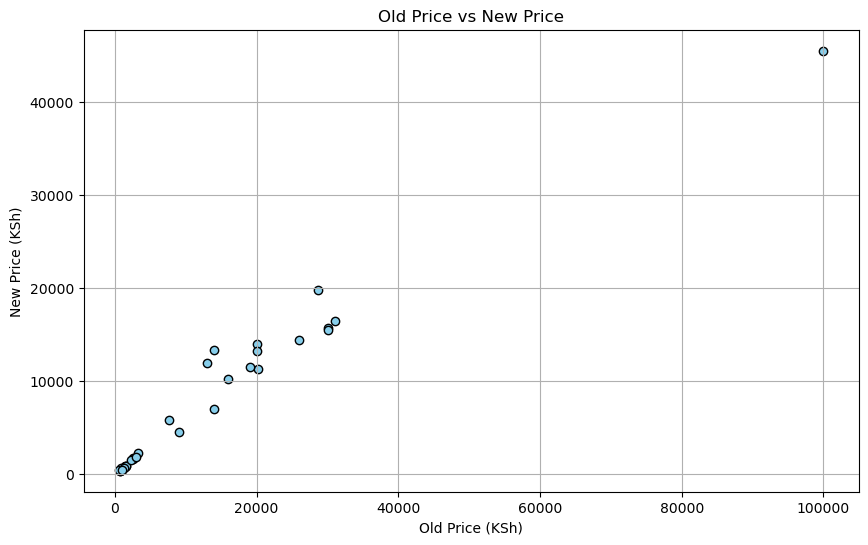

In [7]:
import pandas as pd

# Load the data
df = pd.read_csv('jumia_techweek_products.csv')

# Display the first few rows to understand the structure
print(df.head())

# Convert price and old_price to numeric (remove non-numeric characters and convert to float)
df['price'] = df['price'].str.replace('KSh', '').str.replace(',', '').astype(float)
df['old_price'] = df['old_price'].str.replace('KSh', '').str.replace(',', '').astype(float)

# Extract numeric discount percentage
df['discount'] = df['discount'].str.replace('%', '').astype(float)

# Display the cleaned data
print(df.head())

# Basic statistics
print("Basic Statistics:")
print(df.describe())

# Highest price
highest_price = df['price'].max()
print(f"Highest Price: KSh {highest_price}")

# Lowest price
lowest_price = df['price'].min()
print(f"Lowest Price: KSh {lowest_price}")

# Mean discount
mean_discount = df['discount'].mean()
print(f"Mean Discount: {mean_discount}%")

# Plotting (if necessary)
import matplotlib.pyplot as plt

# Plot histogram of prices
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price (KSh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot boxplot of prices
plt.figure(figsize=(10, 6))
df['price'].plot(kind='box')
plt.title('Boxplot of Prices')
plt.ylabel('Price (KSh)')
plt.grid(True)
plt.show()

# Plot scatter plot of old price vs new price
plt.figure(figsize=(10, 6))
plt.scatter(df['old_price'], df['price'], color='skyblue', edgecolor='black')
plt.title('Old Price vs New Price')
plt.xlabel('Old Price (KSh)')
plt.ylabel('New Price (KSh)')
plt.grid(True)
plt.show()


In [8]:
# Create a script with the necessary code for the Streamlit app
with open('jumia_techweek_dashboard.py', 'w') as f:
    f.write("""

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('jumia_techweek_products.csv')

# Convert price and old_price to numeric (remove non-numeric characters and convert to float)
df['price'] = df['price'].str.replace('KSh', '').str.replace(',', '')
df['old_price'] = df['old_price'].str.replace('KSh', '').str.replace(',', '')

# Convert to numeric with errors='coerce'
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['old_price'] = pd.to_numeric(df['old_price'], errors='coerce')

# Extract numeric discount percentage
df['discount'] = df['discount'].str.replace('%', '')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

# Streamlit app
st.title('Jumia Tech Week Products Dashboard')

# Streamlit sidebar for filters
st.sidebar.header('Filter Options')

# Filter by discount percentage
min_discount = st.sidebar.slider('Min Discount (%)', 0.0, 100.0, 0.0)
max_discount = st.sidebar.slider('Max Discount (%)', 0.0, 100.0, 100.0)

# Filter by price range
min_price = st.sidebar.slider('Min Price (KSh)', float(df['price'].min()), float(df['price'].max()), float(df['price'].min()))
max_price = st.sidebar.slider('Max Price (KSh)', float(df['price'].min()), float(df['price'].max()), float(df['price'].max()))

# Apply filters
filtered_df = df[(df['discount'] >= min_discount) & (df['discount'] <= max_discount) &
                 (df['price'] >= min_price) & (df['price'] <= max_price)]

# Display filtered data
st.write(f"### Showing {filtered_df.shape[0]} products")
st.dataframe(filtered_df)

# Display basic statistics
st.write("### Basic Statistics")
st.write(filtered_df.describe())

# Charts
st.header('Visualizations')

# Bar chart for average price per discount range
st.subheader('Average Price per Discount Range')
avg_price_per_discount = filtered_df.groupby('discount')['price'].mean().reset_index()
st.bar_chart(avg_price_per_discount.set_index('discount'))

# Line chart for price trend
st.subheader('Price Trend')
st.line_chart(filtered_df[['price']].reset_index(drop=True))

# Scatter plot of old price vs new price
st.subheader('Old Price vs New Price')
fig, ax = plt.subplots()
ax.scatter(filtered_df['old_price'], filtered_df['price'], alpha=0.5)
ax.set_xlabel('Old Price (KSh)')
ax.set_ylabel('New Price (KSh)')
ax.set_title('Old Price vs New Price')
st.pyplot(fig)

# Pie chart of discount distribution
st.subheader('Discount Distribution')
discount_counts = filtered_df['discount'].value_counts()
fig, ax = plt.subplots()
ax.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Discount Distribution')
st.pyplot(fig)
    """)

# Run the Streamlit app
!streamlit run jumia_techweek_dashboard.py


'streamlit' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
# Jupyter Notebook Code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, interactive_output
from IPython.display import display

# Load the data
df = pd.read_csv('jumia_techweek_products.csv')

# Convert price and old_price to numeric (remove non-numeric characters and convert to float)
df['price'] = df['price'].str.replace('KSh', '').str.replace(',', '')
df['old_price'] = df['old_price'].str.replace('KSh', '').str.replace(',', '')

# Convert to numeric with errors='coerce'
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['old_price'] = pd.to_numeric(df['old_price'], errors='coerce')

# Extract numeric discount percentage
df['discount'] = df['discount'].str.replace('%', '')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

# Function to update the plots based on filters
def update_plots(min_discount, max_discount, min_price, max_price):
    # Apply filters
    filtered_df = df[(df['discount'] >= min_discount) & (df['discount'] <= max_discount) &
                     (df['price'] >= min_price) & (df['price'] <= max_price)]
    
    # Display filtered data
    display(f"### Showing {filtered_df.shape[0]} products")
    display(filtered_df)
    
    # Display basic statistics
    display("### Basic Statistics")
    display(filtered_df.describe())
    
    # Bar chart for average price per discount range
    avg_price_per_discount = filtered_df.groupby('discount')['price'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='discount', y='price', data=avg_price_per_discount)
    plt.title('Average Price per Discount Range')
    plt.xlabel('Discount (%)')
    plt.ylabel('Average Price (KSh)')
    plt.show()
    
    # Line chart for price trend
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=filtered_df[['price']].reset_index(drop=True))
    plt.title('Price Trend')
    plt.xlabel('Index')
    plt.ylabel('Price (KSh)')
    plt.show()
    
    # Scatter plot of old price vs new price
    plt.figure(figsize=(10, 5))
    plt.scatter(filtered_df['old_price'], filtered_df['price'], alpha=0.5)
    plt.xlabel('Old Price (KSh)')
    plt.ylabel('New Price (KSh)')
    plt.title('Old Price vs New Price')
    plt.show()
    
    # Pie chart of discount distribution
    discount_counts = filtered_df['discount'].value_counts()
    plt.figure(figsize=(10, 5))
    plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Discount Distribution')
    plt.show()

# Interactive widgets for filters
min_discount_slider = FloatSlider(value=0.0, min=0.0, max=100.0, step=0.1, description='Min Discount (%)')
max_discount_slider = FloatSlider(value=100.0, min=0.0, max=100.0, step=0.1, description='Max Discount (%)')
min_price_slider = FloatSlider(value=float(df['price'].min()), min=float(df['price'].min()), max=float(df['price'].max()), step=1.0, description='Min Price (KSh)')
max_price_slider = FloatSlider(value=float(df['price'].max()), min=float(df['price'].min()), max=float(df['price'].max()), step=1.0, description='Max Price (KSh)')

# Create the interactive plot
interact(update_plots, min_discount=min_discount_slider, max_discount=max_discount_slider, min_price=min_price_slider, max_price=max_price_slider)


interactive(children=(FloatSlider(value=0.0, description='Min Discount (%)'), FloatSlider(value=100.0, descrip…

<function __main__.update_plots(min_discount, max_discount, min_price, max_price)>

In [2]:
# Jupyter Notebook Code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, interactive_output
from IPython.display import display

# Load the data
df = pd.read_csv('jumia_techweek_products.csv')

# Convert price and old_price to numeric (remove non-numeric characters and convert to float)
df['price'] = df['price'].str.replace('KSh', '').str.replace(',', '')
df['old_price'] = df['old_price'].str.replace('KSh', '').str.replace(',', '')

# Convert to numeric with errors='coerce'
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['old_price'] = pd.to_numeric(df['old_price'], errors='coerce')

# Extract numeric discount percentage
df['discount'] = df['discount'].str.replace('%', '')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')

# Function to update the plots based on filters
def update_plots(min_discount, max_discount, min_price, max_price):
    # Apply filters
    filtered_df = df[(df['discount'] >= min_discount) & (df['discount'] <= max_discount) &
                     (df['price'] >= min_price) & (df['price'] <= max_price)]
    
    # Display filtered data
    display(f"### Showing {filtered_df.shape[0]} products")
    display(filtered_df)
    
    # Display basic statistics
    display("### Basic Statistics")
    display(filtered_df.describe())
    
    # Bar chart for average price per discount range
    avg_price_per_discount = filtered_df.groupby('discount')['price'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='discount', y='price', data=avg_price_per_discount)
    plt.title('Average Price per Discount Range')
    plt.xlabel('Discount (%)')
    plt.ylabel('Average Price (KSh)')
    plt.show()
    
    # Line chart for price trend
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=filtered_df[['price']].reset_index(drop=True))
    plt.title('Price Trend')
    plt.xlabel('Index')
    plt.ylabel('Price (KSh)')
    plt.show()
    
    # Scatter plot of old price vs new price
    plt.figure(figsize=(10, 5))
    plt.scatter(filtered_df['old_price'], filtered_df['price'], alpha=0.5)
    plt.xlabel('Old Price (KSh)')
    plt.ylabel('New Price (KSh)')
    plt.title('Old Price vs New Price')
    plt.show()
    
    # Pie chart of discount distribution
    discount_counts = filtered_df['discount'].value_counts()
    plt.figure(figsize=(10, 5))
    plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Discount Distribution')
    plt.show()

# Interactive widgets for filters
min_discount_slider = FloatSlider(value=0.0, min=0.0, max=100.0, step=0.1, description='Min Discount (%)')
max_discount_slider = FloatSlider(value=100.0, min=0.0, max=100.0, step=0.1, description='Max Discount (%)')
min_price_slider = FloatSlider(value=float(df['price'].min()), min=float(df['price'].min()), max=float(df['price'].max()), step=1.0, description='Min Price (KSh)')
max_price_slider = FloatSlider(value=float(df['price'].max()), min=float(df['price'].min()), max=float(df['price'].max()), step=1.0, description='Max Price (KSh)')

# Create the interactive plot
interact(update_plots, min_discount=min_discount_slider, max_discount=max_discount_slider, min_price=min_price_slider, max_price=max_price_slider)


interactive(children=(FloatSlider(value=0.0, description='Min Discount (%)'), FloatSlider(value=100.0, descrip…

<function __main__.update_plots(min_discount, max_discount, min_price, max_price)>